In [12]:
import IPython
import json
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import savgol_filter

sys.path.append("../../")
import didgelab.calc.fft
from didgelab.calc.sim.sim import *
from didgelab.calc.fft import *


In [10]:
folder = "../../../assets/didge-database/wav_short/"
wav1 = folder + "1.wav"
wav3 = folder + "3.wav"
#IPython.display.Audio(wav1)
IPython.display.Audio(wav3)


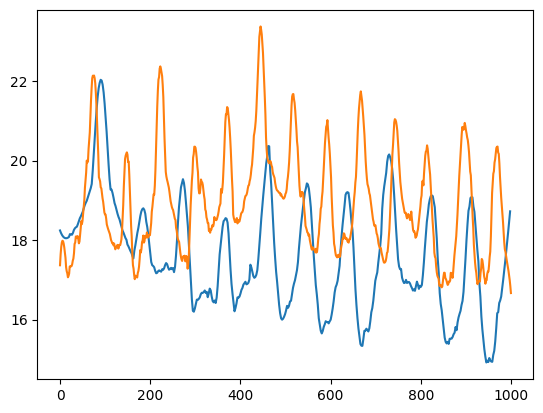

In [32]:
fft_freq_1, fft_1 = do_fft(wav1)
fft_1 = np.log2(fft_1)
fft_freq_3, fft_3 = do_fft(wav3)
fft_3 = np.log2(fft_3)

fft_1 = savgol_filter(fft_1, 20, 3)
fft_3 = savgol_filter(fft_3, 20, 3)
plt.plot(fft_freq_1, fft_1)
plt.plot(fft_freq_3, fft_3)


19.871754616002292 19.874955757357114


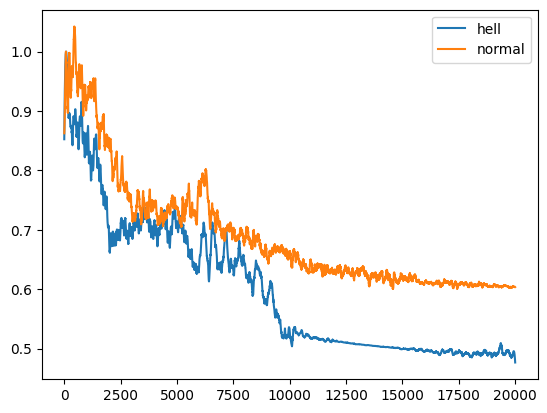

In [54]:
def get_fundamental(fft_freq, fft):
    i = scipy.signal.argrelextrema(fft, np.greater, order=40)
    freqs = fft_freq[i]
    freqs = freqs[freqs>50]
    freqs = freqs[freqs<120]
    assert len(freqs) == 1

    fundamental_freq = freqs[0]
    fundamental_freq_i = np.argmin(np.abs(fft_freq-fundamental_freq))
    return fundamental_freq, fundamental_freq_i

def get_peaks(fft_freq, fft):
    fundamental_freq, fundamental_freq_i = get_fundamental(fft_freq, fft)
    order = 1
    while fft_freq[fundamental_freq_i+order] < fundamental_freq*1.3:
        order += 1
    peaks = [fundamental_freq]
    for i in scipy.signal.argrelextrema(fft, np.greater, order=order)[0]:
        freq = fft_freq[i]
        if freq>fundamental_freq:
            peaks.append(freq)
    return np.array(peaks)

fft_freq_1, fft_1 = do_fft(wav1, maxfreq=20000)
fft_1 = np.log2(fft_1)
fft_freq_3, fft_3 = do_fft(wav3, maxfreq=20000)
fft_3 = np.log2(fft_3)

fft_1 = savgol_filter(fft_1, 100, 3)
fft_3 = savgol_filter(fft_3, 100, 3)

f1, v1 = get_fundamental(fft_freq_1, fft_1)
f3, v3 = get_fundamental(fft_freq_3, fft_3)

v1 = fft_1[v1]
v3 = fft_3[v3]
print(v1, v3)
#fft_freq_1_shifted = fft_freq_1[0:-8].copy()
#fft_1_shifted = fft_1[8:].copy()
fft_1_shifted = fft_1.copy()
fft_freq_1_shifted = fft_freq_1.copy()
fft_1_shifted /= v1
fft_3_scaled = fft_3.copy()
fft_3_scaled = fft_3 / v3
plt.plot(fft_freq_1_shifted, fft_1_shifted, label="hell")
plt.plot(fft_freq_3, fft_3_scaled, label="normal")
plt.legend()